In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 

In [3]:
#normal eqn
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.10491628],
       [2.90627576]])

In [4]:
#svd
np.linalg.pinv(X_b).dot(y)

array([[4.10491628],
       [2.90627576]])

In [5]:
#GD
eta = 0.1
n_iterations =1000
m  =100 
theta = np.random.randn(2,1)
for iteration in range (n_iterations):
  grad = 2/m*X_b.T@(X_b@theta-y)
  theta = theta -eta*grad


In [6]:
theta

array([[4.10491628],
       [2.90627576]])

In [9]:
#ٍSGD
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
theta

array([[4.07269069],
       [2.92227135]])

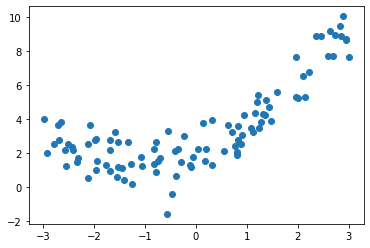

In [12]:
#PolyReg
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features =PolynomialFeatures(degree =2,include_bias =  False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.54342124]
[-2.54342124  6.4689916 ]


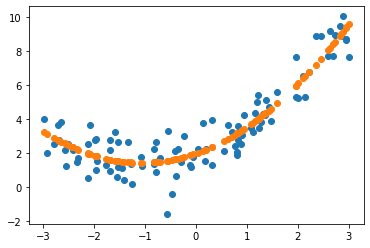

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
y_p = lin_reg.predict(X_poly)
plt.scatter(X,y)
plt.scatter(X,y_p)
plt.show()

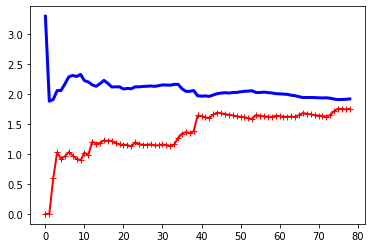

In [45]:
#learning curves 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

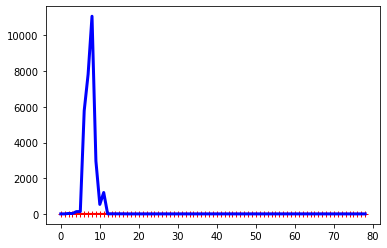

In [47]:
from sklearn.pipeline import Pipeline
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)